In [74]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib as plt

from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict, KFold, GridSearchCV
from sklearn.preprocessing import RobustScaler, OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, TransformedTargetRegressor
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier


In [75]:
df = pd.read_csv('/content/insurance.csv', na_values=' ?')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


Cargo el dataset

In [76]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Verifico que no hayan nulos

In [77]:
df.shape

(1338, 7)

In [78]:
df.columns


Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [79]:
df.columns = df.columns.str.strip()
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

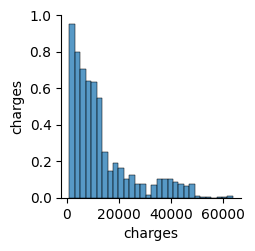

In [80]:
sns.pairplot(df[["charges"]])

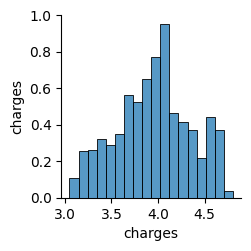

In [81]:
sns.pairplot(np.log10(df[['charges']]))

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [83]:
x, y = df.drop(["charges"], axis = 1), df["charges"]

Saco la variable charges del analisis ya que es mi variable dependiente

In [84]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, random_state=42)

In [85]:
X_train

,age,sex,bmi,children,smoker,region
693,24,male,23.655,0,no,northwest
1297,28,female,26.510,2,no,southeast
634,51,male,39.700,1,no,southwest
1022,47,male,36.080,1,yes,southeast
178,46,female,28.900,2,no,southwest
...,...,...,...,...,...,...
1095,18,female,31.350,4,no,northeast
1130,39,female,23.870,5,no,southeast
1294,58,male,25.175,0,no,northeast
860,37,female,47.600,2,yes,southwest


In [86]:
y_train

693      2352.96845
1297     4340.44090
634      9391.34600
1022    42211.13820
178      8823.27900
           ...     
1095     4561.18850
1130     8582.30230
1294    11931.12525
860     46113.51100
1126    10214.63600
Name: charges, Length: 1003, dtype: float64

In [87]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

caterogical_columns = ["sex", "smoker", "region"]
numerical_columns = ["age", "bmi", "children"]

preprocessor = make_column_transformer((OneHotEncoder(drop="if_binary"), caterogical_columns),
                                       remainder="passthrough",
                                       verbose_feature_names_out=False,)

 Hago un preprocesador de columnas que aplica codificación one-hot a las columnas categóricas y mantiene las columnas numéricas sin transformación. El preprocesador se puede utilizar en un pipeline de aprendizaje automático para realizar transformaciones en los datos antes de entrenar un modelo.

In [88]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.compose import TransformedTargetRegressor
import scipy as sp

In [89]:
model = make_pipeline(
    preprocessor,
    TransformedTargetRegressor(regressor=Ridge (alpha=1e-10), func=np.log10, inverse_func=sp.special.exp10),
)

 Hago un pipeline que aplica el preprocesamiento de columnas y luego entreno un modelo de regresión Ridge con una transformación logarítmica en el objetivo. El pipeline se utiliza para entrenar y realizar predicciones en datos de entrada.

In [90]:
model.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(drop='if_binary'),
                                                  ['sex', 'smoker', 'region'])],
                                   verbose_feature_names_out=False)),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(func=<ufunc 'log10'>,
                                            inverse_func=<ufunc 'exp10'>,
                                            regressor=Ridge(alpha=1e-10)))])

Ajusto los parámetros del modelo utilizando los datos de entrenamiento

In [91]:
from sklearn.metrics import median_absolute_error

y_pred = model.predict(X_train)

mae = median_absolute_error(y_train, y_pred)
string_score = f"MAE on training set: {mae: 2f} euros"
y_pred = model.predict(X_test)
mae = median_absolute_error(y_test, y_pred)
string_score += f"\nMAR on testing set: {mae: 2f} euros"

Se realizan evaluaciones del rendimiento del modelo utilizando el MAE.

Almaceno las predicciones en y_pred.

Depues calculo el MAE comparando las predicciones del modelo y_pred con los valores reales del conjunto de datos de entrenamiento y_train.

Luego, se construye una cadena de texto string_score que muestra el valor del MAE en el conjunto de datos de entrenamiento.

A continuación, se utilizan las mismas operaciones para calcular el MAE en el conjunto de datos de prueba (X_test y y_test). Las predicciones se almacenan en y_pred y se calcula el MAE comparando las predicciones con los valores reales.

Finalmente, se actualiza la cadena de texto string_score para incluir el valor del MAE en el conjunto de datos de prueba.

In [92]:
print(string_score)

MAE on training set:  933.902042 euros
MAR on testing set:  953.419613 euros


En este caso, el valor del MAE en el conjunto de datos de entrenamiento es de 933.902042 euros, lo que significa que, en promedio, las predicciones del modelo difieren de los valores reales en aproximadamente 933.902042 euros en el conjunto de datos de entrenamiento.

El valor del MAE en el conjunto de datos de prueba es de 953.419613 euros, lo que indica que, en promedio, las predicciones del modelo difieren de los valores reales en aproximadamente 953.419613 euros en el conjunto de datos de prueba.



In [93]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Truths')

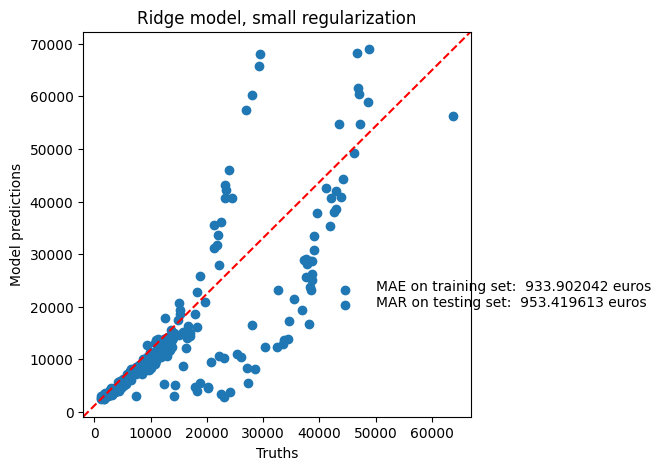

In [94]:
fig, ax = plt.subplots (figsize = (5,5))
plt.scatter(y_test, y_pred)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c="red")
plt.text(50000, 20000, string_score)
plt.title("Ridge model, small regularization")
plt.ylabel("Model predictions")
plt.xlabel("Truths")

In [95]:
feature_names = model[:-1].get_feature_names_out()

coefs = pd.DataFrame(
    model[-1].regressor_.coef_,
    columns=["Coefficients"],
    index=feature_names
)

coefs

,Coefficients
sex_male,-0.032023
smoker_yes,0.671235
region_northeast,0.034845
region_northwest,0.009644
region_southeast,-0.026922
region_southwest,-0.017383
age,0.015050
bmi,0.005766
children,0.041345


Estos coeficientes representan el impacto relativo de cada característica en la predicción del valor objetivo (en este caso, el costo del seguro). Cada coeficiente indica la dirección (positiva o negativa) y la magnitud del efecto que la característica tiene sobre el costo del seguro.

Cómo podemos ver un factor clave que influye en el precio del seguro de vida es si fuma o no.

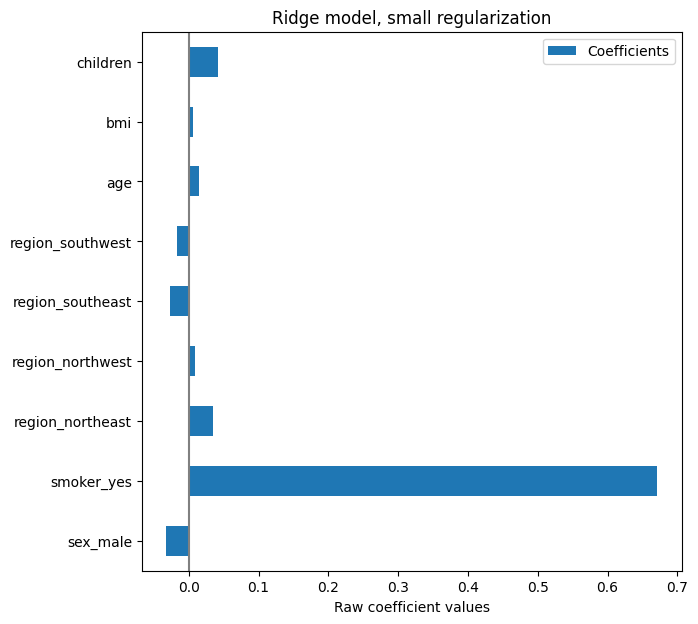

In [96]:
coefs.plot.barh(figsize=(9,7))
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.xlabel("Raw coefficient values")
plt.subplots_adjust(left=0.3)

Aca podemos ver un gráfico de barras horizontales que muestra los coeficientes del modelo de regresión, lo que te da la importancia relativa de cada característica en la predicción del costo del seguro de vida.

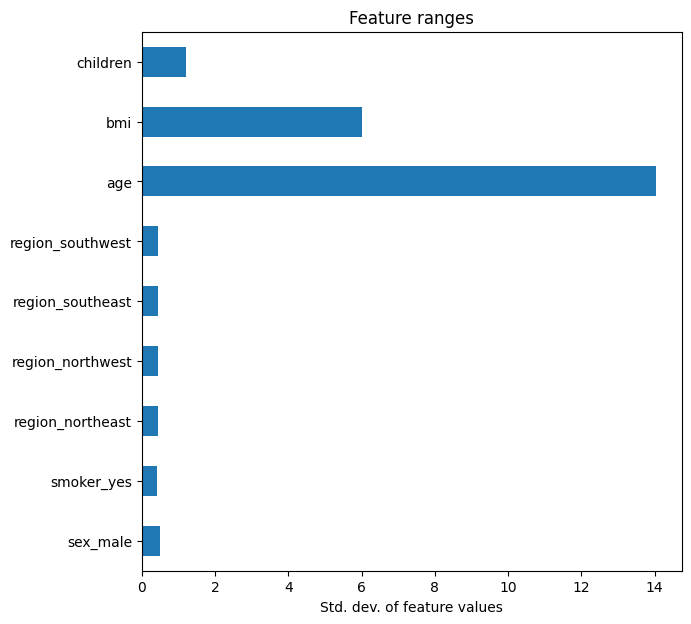

In [97]:
X_train_preprocessed = pd.DataFrame(
    model[:-1].transform(X_train), columns=feature_names
)

X_train_preprocessed.std(axis=0).plot.barh(figsize=(9,7))
plt.title("Feature ranges")
plt.xlabel("Std. dev. of feature values")
plt.subplots_adjust(left=0.3)

Aca vemos un gráfico de barras horizontales que muestra las desviaciones estándar de las características en el conjunto de entrenamiento preprocesado. Esto te permite visualizar la variabilidad de las características y tener una idea de la escala y rango de valores de cada una.

 Podemos ver que "age" y "bmi" tienen barras más largas, significa que estas características tienen una mayor desviacion estaandar en comparacion con las demás características.

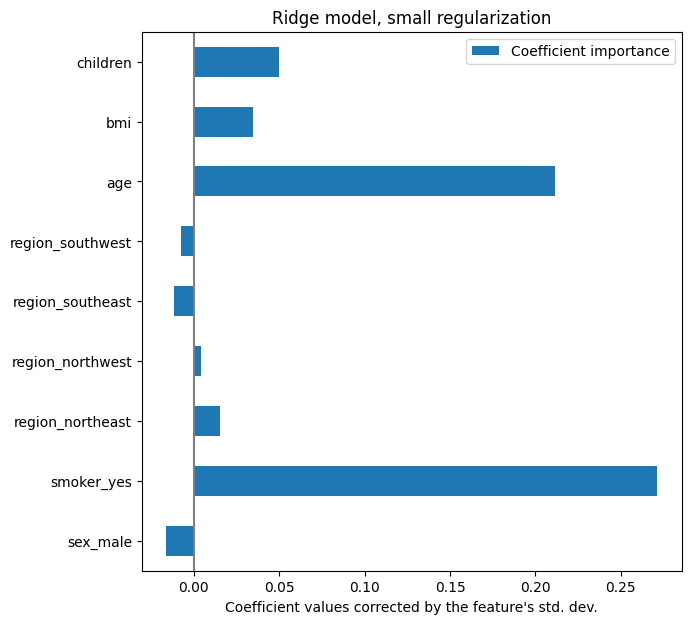

In [98]:
coefs = pd.DataFrame(
    model[-1].regressor_.coef_ * X_train_preprocessed.std(axis=0),
    columns=["Coefficient importance"],
    index=feature_names,
)
coefs.plot(kind="barh", figsize=(9,7))
plt.xlabel("Coefficient values corrected by the feature's std. dev.")
plt.title("Ridge model, small regularization")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)

En este gráfico podemos ver una representación visual de la importancia relativa de cada característica corrigiendo los coeficientes por la desviación estándar. Ayuda a identificar qué características tienen una mayor influencia en el resultado del modelo en comparación con otras características.

Cómo es evidente la edad y si fuma o no, son las que tienen mayor influencia en el precio del seguro.

In [99]:
from sklearn.model_selection import cross_validate, RepeatedKFold
from sklearn.metrics import make_scorer
from sklearn.compose import TransformedTargetRegressor
import pandas as pd

In [100]:
cv = RepeatedKFold(n_splits=5, n_repeats=5, random_state=0)
cv_model = cross_validate(
    model,
    x,
    y,
    cv=cv,
    return_estimator=True,
    n_jobs=2,
)
coefs = pd.DataFrame(
    [
        est[-1].regressor_.coef_
        for est, (train_idx, _) in zip(cv_model["estimator"], cv.split(x, y))
    ],
    columns=feature_names,
)

coefs

,sex_male,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest,age,bmi,children
0,-0.022274,0.678699,0.034504,0.011293,-0.028223,-0.016470,0.015081,0.006135,0.042513
1,-0.032437,0.657186,0.045999,0.007801,-0.036774,-0.017616,0.015068,0.006165,0.045869
2,-0.034872,0.678707,0.037145,0.012727,-0.030392,-0.018762,0.014438,0.006508,0.041976
3,-0.037449,0.676605,0.036712,0.010640,-0.027553,-0.020348,0.015316,0.005623,0.047211
4,-0.036527,0.684670,0.035745,0.008775,-0.028157,-0.016498,0.015205,0.004552,0.043439
5,-0.020575,0.671365,0.038282,0.003324,-0.030651,-0.011046,0.014900,0.005359,0.041673
6,-0.036975,0.682932,0.047443,0.009310,-0.034042,-0.021817,0.014931,0.006963,0.043065
7,-0.035531,0.656864,0.039919,0.017638,-0.027994,-0.028972,0.015204,0.005613,0.045255
8,-0.035005,0.683486,0.036770,0.007685,-0.025741,-0.018340,0.014920,0.004652,0.045196
9,-0.034959,0.678950,0.028606,0.013506,-0.032443,-0.010320,0.015176,0.006309,0.046243


En este código, se realiza una validación cruzada repetida para evaluar el rendimiento del modelo en múltiples divisiones del conjunto de datos.


Cada fila del DataFrame representa los coeficientes de un modelo ajustado en una división específica.

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:166: FutureWarning: Setting a gradient palette using color= is deprecated and will be removed in version 0.13. Set `palette='dark:k'` for same effect.
  warnings.warn(msg, FutureWarning)


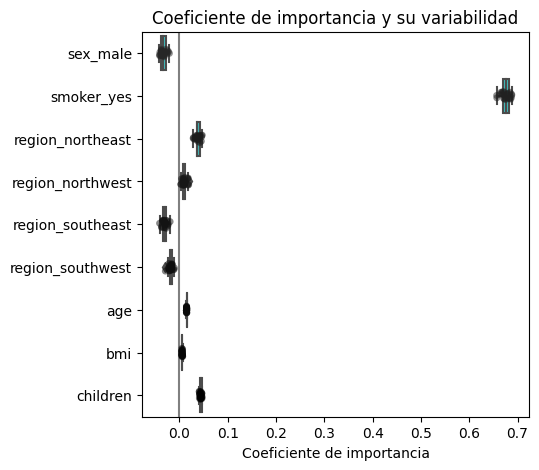

In [101]:
plt.figure(figsize=(5, 5))
sns.stripplot(data=coefs, orient="h", color="k", alpha=0.5)
sns.boxplot(data=coefs, orient="h", color="cyan", saturation=0.5)
plt.axvline(x=0, color="0.5")
plt.title("Coeficiente de importancia y su variabilidad")
plt.xlabel("Coeficiente de importancia")
plt.show()

Este último gráfico muestra la importancia relativa de los coeficientes del modelo y su variabilidad a través de la validación cruzada. Los puntos individuales representan los valores de los coeficientes en cada división, y las cajas resumen la distribución de los valores.

Vemos que fumar o no es muy relevante y se considera un coeficiente importante.






# EJERCICIO 2

In [102]:
import pickle


In [103]:
with open('modelo.pkl', 'wb') as file:
    pickle.dump(model, file)


In [104]:

# Cargar el modelo desde el archivo pkl
with open('modelo.pkl', 'rb') as file:
     model = pickle.load(file)

# EJERCICIO 3

In [112]:
from flask import Flask, request, jsonify
import pickle

# Cargar el modelo entrenado desde el archivo pkl
with open('modelo.pkl', 'rb') as file:
    model = pickle.load(file)

# Inicializar la aplicación Flask
app = Flask(__name__)

# Definir la ruta y el método para realizar predicciones
@app.route('/predict', methods=['POST'])
def predict():
    # Obtener los datos de la solicitud
    data = request.json

    # Realizar la predicción utilizando el modelo cargado
    prediction = model.predict([data['features']])

    # Devolver la predicción como respuesta en formato JSON
    response = {'prediction': prediction.tolist()}
    return jsonify(response)

# Especificar la configuración para ejecutar la aplicación en todas las interfaces de red
if __name__ == '__main__':
    app.run()


 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit


# EXTRA

In [113]:
pip install tox


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.0/152.0 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.1/199.1 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.5/468.5 kB 46.9 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
  Attempting uninstall: filelock
    Found existing installation: filelock 3.12.0
    Uninstalling filelock-3.12.0:
      Successfully uninstalled filelock-3.12.0
  Attempting uninstall: chardet
    Found existing installation: chardet 4.0.0
    Uninstalling chardet-4.0.0:
      Successfully uninstalled chardet-4.0.0
  Attempting uninstall: cachetools
    Found existing installation: cachetools 5.3.0

In [114]:
!tox


py3: install_deps> python -I -m pip install pytest
py3: commands[0]> pytest
============================= test session starts ==============================
platform linux -- Python 3.10.12, pytest-7.3.2, pluggy-1.0.0
cachedir: .tox/py3/.pytest_cache
rootdir: /content
collected 1 item                                                               

test_example.py .                                                        [100%]

============================== 1 passed in 0.02s ===============================
  py3: OK (9.25=setup[8.84]+cmd[0.40] seconds)
  congratulations :) (9.38 seconds)
